In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class EDM(object):
    """
    Electric dipole moment in e*cm.
    
    uncertainty in ...
    """
    def __init__(self, value, uncertainty=None, ref=None, year=None):
        self.value = value
        self.uncertainty = uncertainty
        self.ref = ref
        self.year = year


In [4]:
nEDM_measurements = []
nEDM_measurements.append(EDM(3.0e-26, year=2015, ref="Pendlebury2015"))
nEDM_measurements.append(EDM(1.8e-26, year=2020, ref="Abel2020"))


In [17]:
Hg_measurements = []
Hg_measurements.append(EDM(1.3e-27, year=1993, ref="Jacobs1993"))
Hg_measurements.append(EDM(8.7e-28, year=1995, ref="Jacobs1995"))
Hg_measurements.append(EDM(2.1e-28, year=2001, ref="Romalis2001"))
Hg_measurements.append(EDM(3.1e-29, year=2009, ref="Griffith2009"))
Hg_measurements.append(EDM(7.6e-30, year=2016, ref="Graner2016"))


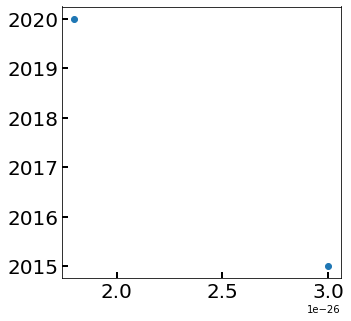

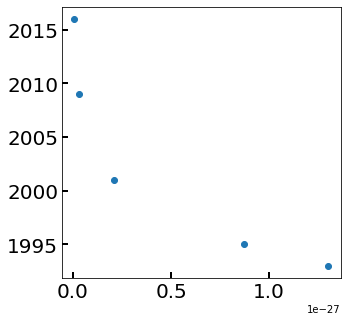

In [18]:
def plot_EDMs(EDMs):
    fig, ax = plt.subplots(figsize=(5, 5))
    
    EDM_vals = []
    EDM_years = []
    for kk in range(len(EDMs)):
        EDM_vals.append(EDMs[kk].value)
        EDM_years.append(EDMs[kk].year)

    ax.scatter(EDM_vals, EDM_years)

    ax.tick_params(axis="both", direction="in", length=6, width=2, labelsize=20)


    plt.show()

def plot_neutron_EDMs(EDMs):

    fig, ax = _plt.subplots(figsize=(5, 5))
    #ax.set_ylim(0.5e-14, 2e-5)
    #ax.set_xlim(1989, 2031)
    #ax.set_xticks([1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025, 2030])
    ax.set_yscale("log")
    #ax.set_yticks([1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14])


    ax.tick_params(axis="both", direction="in", length=6, width=2, labelsize=20)
    ax.set_ylabel("neutron EDM limit [e*cm]", fontsize=24)
    ax.set_xlabel("year", fontsize=24)

    ax.scatter(neutron_plots[0], neutron_plots[1], label="Neutron EDM", s=100, marker="s")
    ax.scatter(mercury_plots[0], mercury_plots[1], label="${}^{199}$Hg EDM", s=200, marker="*")
    ax.scatter(radium_plots[0], radium_plots[1], label="${}^{225}$Ra EDM", s=100, marker="v")
    ax.scatter(molecular_ion_plots[0], molecular_ion_plots[1], label="Molecular ion (estimate)", s=100, color="gray")
    ax.vlines([2020.5], 1e-15, 1, linestyles="dashdot")
    ax.legend(fontsize=20, loc=3)
    #_plt.savefig("nedm.png", dpi=100, transparent=True)
    plt.show()


def plot_Hg_EDMs(EDMs):
    return None



plot_EDMs(nEDM_measurements)

plot_EDMs(Hg_measurements)

In [76]:
def neutron_edm_to_theta_qcd(neutron_edm):
    factor = 0.0039e-13 # PRL 115, 062001 (2015)
    return neutron_edm / factor

def radium_edm_to_theta_qcd(radium_edm):
    factor = 6.79e-17 # Andrew's Schiff moment notebook
    return radium_edm / factor

def mercury_edm_to_theta_qcd(mercury_edm):
    factor = 7.4e-30 / 1.5e-10  # PRL 116, 161601 (2016)
    return mercury_edm / factor

In [83]:
neutron_results = {
    #"Baker2006": (2006, 2.9e-26), # revised by 2015 result
    "Pendlebury2015": (2015, 3.0e-26),
    "Abel2020": (2020, 1.8e-26)
}
neutron_results1 = {
    "Pendlebury2015": (2002, 3.0e-26), # data actually taken 1998 - 2002
    "Abel2020": (2020, 1.8e-26)
}

neutron_plots = [[], [], []]
for kk in neutron_results1:
    neutron_plots[0].append(neutron_results1[kk][0])
    neutron_plots[1].append(neutron_edm_to_theta_qcd(neutron_results1[kk][1]))
    neutron_plots[2].append(kk)

In [84]:
radium_results = {
    "Parker2015": (2015, 5.0e-22),
    "Bishof2016": (2016, 1.4e-23)
}

radium_plots = [[], [], []]
for kk in radium_results:
    radium_plots[0].append(radium_results[kk][0])
    radium_plots[1].append(radium_edm_to_theta_qcd(radium_results[kk][1]))
    radium_plots[2].append(kk)

In [85]:
mercury_edm = {
    "Jacobs1993": (1993, 1.3e-27),
    "Jacobs1995": (1995, 8.7e-28),
    "Romalis2001": (2001, 2.1e-28),
    "Griffith2009": (2009, 3.1e-29),
    "Graner2016": (2016, 7.6e-30),
}

mercury_plots = [[], [], []]
for kk in mercury_results:
    mercury_plots[0].append(mercury_results[kk][0])
    mercury_plots[1].append(mercury_edm_to_theta_qcd(mercury_results[kk][1]))
    mercury_plots[2].append(kk)

In [93]:
molecular_ion_plots = [
    [2024, 2026, 2028],
    [1.1e-10, 1.5e-11, 1.5e-14],
    [r"RaOCH${{}_3}^+$ Gen. I", r"RaOCH${{}_3}^+$ Gen. II", r"PaXY${}^+$"]
]

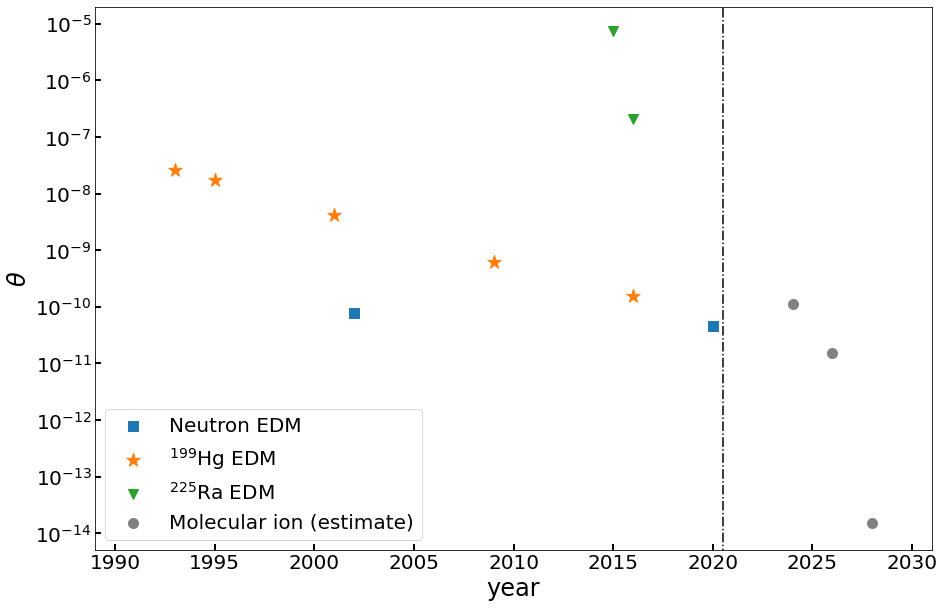

In [126]:
fig, ax = _plt.subplots(figsize=(15, 10))
ax.set_ylim(0.5e-14, 2e-5)
ax.set_xlim(1989, 2031)
ax.set_xticks([1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025, 2030])
ax.set_yscale("log")
ax.set_yticks([1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14])
ax.tick_params(axis="x", direction="in", length=6, width=2, labelsize=20)
ax.tick_params(axis="y", direction="in", length=6, width=2, labelsize=20)
ax.set_ylabel(r"$\theta$", fontsize=24)
ax.set_xlabel("year", fontsize=24)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
#_plt.savefig("frame.png", dpi=600, transparent=True)
ax.scatter(neutron_plots[0], neutron_plots[1], label="Neutron EDM", s=100, marker="s")
ax.scatter(mercury_plots[0], mercury_plots[1], label="${}^{199}$Hg EDM", s=200, marker="*")
ax.scatter(radium_plots[0], radium_plots[1], label="${}^{225}$Ra EDM", s=100, marker="v")
ax.scatter(molecular_ion_plots[0], molecular_ion_plots[1], label="Molecular ion (estimate)", s=100, color="gray")
ax.vlines([2020.5], 1e-15, 1, linestyles="dashdot")
ax.legend(fontsize=20, loc=3)
_plt.savefig("nedm.png", dpi=100, transparent=True)
_plt.show()